# Explore Tara

In [10]:
# imports
from importlib import reload
import numpy as np
import pandas
import datetime

from matplotlib import pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
import cartopy

from oceancolor.tara import io
from oceancolor.tara import spectra

In [26]:
tformM = ccrs.Mollweide()
tformP = ccrs.PlateCarree()

# Load the table

In [2]:
tara_db = io.load_tara_db()

In [3]:
tara_db.head()

,date,time,lat,lon,Wt,sal,ap405.5,ap410.1,ap414.4,ap419,...,sig_cp694.9,sig_cp707.8,sig_cp711,sig_cp714.2,sig_cp720.5,sig_cp723.2,sig_cp726,sig_cp728.8,sig_cp731.6,sig_cp734.5
0,20101127,00:48:00,-35.9020,-55.0559,19.9823,27.9347,0.0946,0.0945,0.0951,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20101127,00:49:00,-35.9039,-55.0557,19.9328,27.9828,0.0937,0.0942,0.0940,0.0935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20101127,00:50:00,-35.9057,-55.0555,19.9248,27.9704,0.0950,0.0946,0.0956,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20101127,00:51:00,-35.9076,-55.0552,19.9006,28.0009,0.0931,0.0939,0.0950,0.0937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20101127,00:52:00,-35.9095,-55.0550,19.8383,28.1017,0.0932,0.0928,0.0936,0.0924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Geographical plots

## 2010

In [8]:
in_2010 = (tara_db.datetime >= datetime.datetime(2010,1,1)) & (tara_db.datetime < datetime.datetime(2011,1,1))

In [17]:
tara_2010 = tara_db[in_2010]
tara_2010.head()

,date,time,lat,lon,Wt,sal,ap405.5,ap410.1,ap414.4,ap419,...,sig_cp694.9,sig_cp707.8,sig_cp711,sig_cp714.2,sig_cp720.5,sig_cp723.2,sig_cp726,sig_cp728.8,sig_cp731.6,sig_cp734.5
0,20101127,00:48:00,-35.9020,-55.0559,19.9823,27.9347,0.0946,0.0945,0.0951,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20101127,00:49:00,-35.9039,-55.0557,19.9328,27.9828,0.0937,0.0942,0.0940,0.0935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20101127,00:50:00,-35.9057,-55.0555,19.9248,27.9704,0.0950,0.0946,0.0956,0.0936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20101127,00:51:00,-35.9076,-55.0552,19.9006,28.0009,0.0931,0.0939,0.0950,0.0937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20101127,00:52:00,-35.9095,-55.0550,19.8383,28.1017,0.0932,0.0928,0.0936,0.0924,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
tara_2010.cruise

0             BA-Ushuaia
1             BA-Ushuaia
2             BA-Ushuaia
3             BA-Ushuaia
4             BA-Ushuaia
               ...      
302774    Male-StBrandon
302775    Male-StBrandon
302776    Male-StBrandon
302777    Male-StBrandon
302778    Male-StBrandon
Name: cruise, Length: 82370, dtype: object

### Plot by cruise

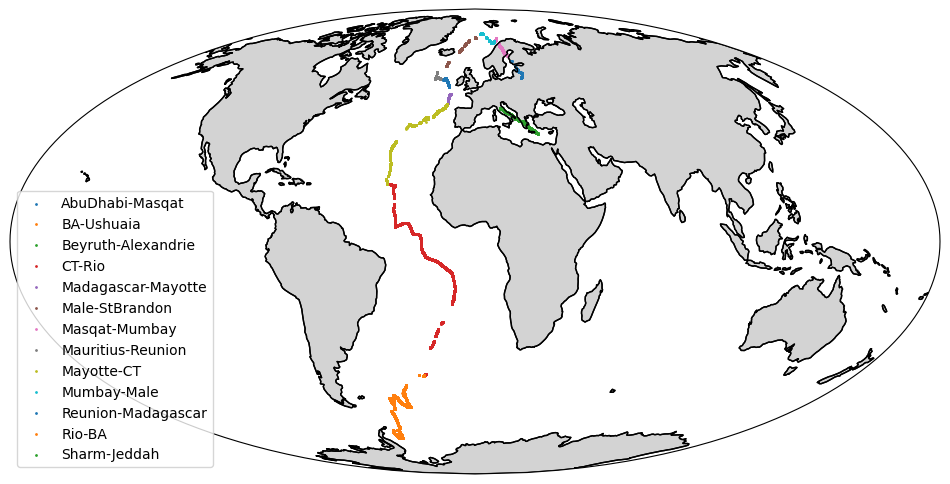

In [25]:
fig = plt.figure(figsize=(12,8))
plt.clf()

ax = plt.subplot(projection=tformM)

for cruise in np.unique(tara_2010.cruise):
    on_cruise = tara_2010.cruise == cruise
    img = plt.scatter(x=tara_2010[on_cruise].lat,
        y=tara_2010[on_cruise].lon,
        #c=hp_plot[good], 
        #cmap=cm,
        #vmin=0.,
        #vmax=vmax, 
        s=1,
        transform=tformP,
                     label=cruise)

# Coast lines
ax.coastlines(zorder=10)
ax.add_feature(cartopy.feature.LAND, 
    facecolor='lightgray', edgecolor='black')
ax.set_global()
ax.legend(loc='lower left')

plt.show()

### Salinity

In [30]:
tara_2010.sal.min(), tara_2010.sal.max()

(-9999.0, 40.3325)

In [33]:
gd_sal = tara_2010.sal > 15.

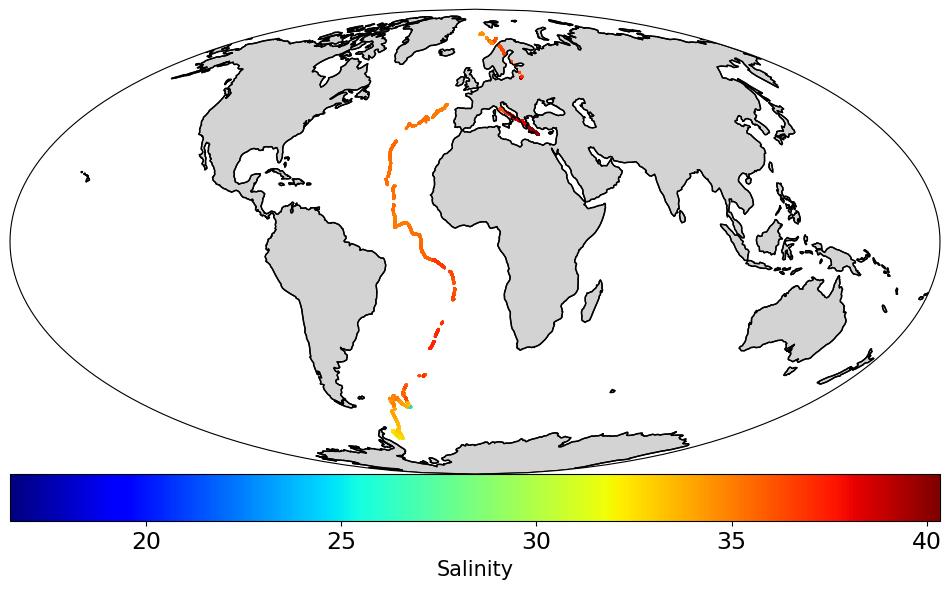

In [34]:
fig = plt.figure(figsize=(12,8))
plt.clf()

ax = plt.subplot(projection=tformM)

img = plt.scatter(x=tara_2010[gd_sal].lat,
    y=tara_2010[gd_sal].lon,
    c=tara_2010[gd_sal].sal, 
    cmap='jet',
    #vmin=0.,
    #vmax=vmax, 
    s=1,
    transform=tformP)

# Coast lines
ax.coastlines(zorder=10)
ax.add_feature(cartopy.feature.LAND, 
    facecolor='lightgray', edgecolor='black')
ax.set_global()
#ax.legend(loc='lower left')

# Colorbar
cb = plt.colorbar(img, orientation='horizontal', pad=0.)
lbl = 'Salinity'
cb.set_label(lbl, fontsize=15.)
cb.ax.tick_params(labelsize=17)


plt.show()